# Setting Up

In [0]:
#remove " > /dev/null 2>&1" to see what is going on under the hood
!pip install pyvirtualdisplay plotly xvfbwrapper > /dev/null 2>&1
!apt-get update -y > /dev/null 2>&1
!apt-get install -y xvfb > /dev/null 2>&1
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import sys

if "../" not in sys.path:
  sys.path.append("../") 

In [0]:
import gym
import plotly.graph_objects as go

from src import utils

xdpyinfo was not found, X start can not be checked! Please install xdpyinfo!


In [0]:
env = gym.make('CartPole-v0')

# Tabular

## QLearning

In [0]:
from src.q_learning import QLearning


q_learning_mean = utils.visualize(
    QLearning,
    env=env,
    n_X=1,
    n_X_dot=1,
    n_theta=6,
    n_theta_dot=12,
    final_score=201,
)

## SARSA

attempt 1
Episode 0101: Average score = 30.9900832940437, total time = 0.6899080276489258
Episode 0201: Average score = 123.38299999999995, total time = 2.4162683486938477
Episode 0301: Average score = 161.804, total time = 3.0878255367279053
Episode 0401: Average score = 167.831, total time = 3.2756147384643555
Episode 0501: Average score = 151.03199999999998, total time = 2.7729883193969727
Episode 0601: Average score = 161.32600000000008, total time = 3.1586966514587402
Episode 0701: Average score = 164.76699999999997, total time = 3.1901955604553223
Episode 0801: Average score = 168.08399999999995, total time = 3.216568946838379
Episode 0901: Average score = 160.72000000000003, total time = 3.0094873905181885
attempt 2
Episode 0101: Average score = 22.609170202734564, total time = 0.4286985397338867
Episode 0201: Average score = 14.091000000000006, total time = 0.24042248725891113
Episode 0301: Average score = 11.528999999999996, total time = 0.24714088439941406
Episode 0401: Avera

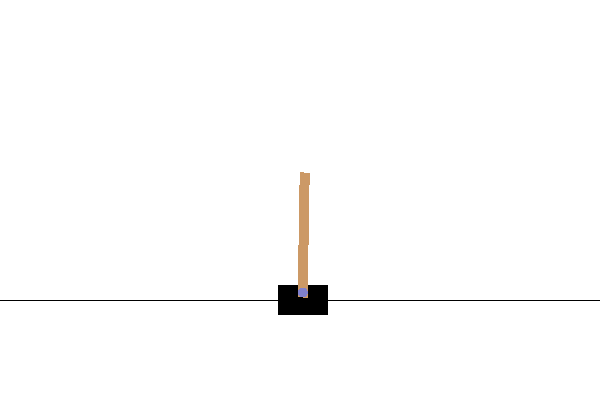

In [0]:
from src.sarsa import SARSA

sarsa_mean = utils.visualize(SARSA, env, n_X = 1, n_X_dot = 1, n_theta = 6, n_theta_dot = 12, final_score=201)

## First Visit Monte Carlo

In [0]:
from src.first_visit_mc import FirstVisitMC

first_visit_mc_mean = utils.visualize(FirstVisitMC, env, n_X = 1, n_X_dot = 1, n_theta = 6, n_theta_dot = 12, final_score=201)


## Expected SARSA

attempt 1
Episode 0101: Average score = 36.11453716800252, total time = 0.4833056926727295
Episode 0201: Average score = 116.49300000000001, total time = 1.7199466228485107
Episode 0301: Average score = 196.6499999999998, total time = 2.594156503677368
Episode 0401: Average score = 196.95, total time = 2.737739086151123
Episode 0501: Average score = 182.63000000000008, total time = 2.500298500061035
Episode 0601: Average score = 166.14499999999995, total time = 2.3558127880096436
Episode 0701: Average score = 173.68500000000012, total time = 2.360696792602539
Episode 0801: Average score = 178.74, total time = 2.508509397506714
Episode 0901: Average score = 199.26, total time = 2.5469179153442383
attempt 2
Episode 0101: Average score = 20.3821035674996, total time = 0.3018949031829834
Episode 0201: Average score = 14.948999999999996, total time = 0.19609665870666504
Episode 0301: Average score = 12.940999999999997, total time = 0.18098163604736328
Episode 0401: Average score = 12.472000

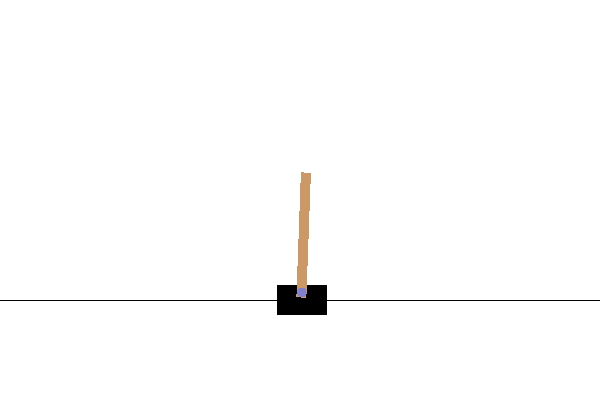

In [0]:
from src.expected_sarsa import ExpectedSARSA

expected_sarsa_mean = utils.visualize(ExpectedSARSA, env, n_X = 1, n_X_dot = 2, n_theta = 6, n_theta_dot = 12, final_score=201)


## Every Visit Monte Carlo

In [0]:
from src.every_visit_mc import EveryVisitMC


every_visit_mc_mean = utils.visualize(EveryVisitMC, env, n_X = 1, n_X_dot = 1, n_theta = 6, n_theta_dot = 12, final_score=201)

## SARSA($\lambda$)

In [0]:
from src.sarsa_lambda import SARSALambda


sarsa_lambda_mean = utils.visualize(SARSALambda, env, n_X = 1, n_X_dot = 1, n_theta = 6, n_theta_dot = 12, final_score=201)


## QLearning($\lambda$)

In [0]:
from src.q_learning_lambda import QLearningLambda


q_learning_lambda_mean = utils.visualize(QLearningLambda, env, n_X = 1, n_X_dot = 1, n_theta = 6, n_theta_dot = 12, final_score=201)


## Comparison

In [0]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=q_learning_mean.index,
                          y=q_learning_mean['Score'],
                          mode='lines+markers',
                          name='QLearning'
                          ))
fig.add_trace(go.Scatter(x=sarsa_mean.index,
                          y=sarsa_mean['Score'],
                          mode='lines+markers',
                          name='SARSA'
                          ))
fig.add_trace(go.Scatter(x=expected_sarsa_mean.index,
                          y=expected_sarsa_mean['Score'],
                          mode='lines+markers',
                          name='Expected SARSA'
                          ))
fig.add_trace(go.Scatter(x=first_visit_mc_mean.index,
                          y=first_visit_mc_mean['Score'],
                          mode='lines+markers',
                          name='First Visit MC'
                          ))
fig.add_trace(go.Scatter(x=every_visit_mc_mean.index,
                          y=every_visit_mc_mean['Score'],
                          mode='lines+markers',
                          name='Every Visit MC'
                          ))
fig.add_trace(go.Scatter(x=sarsa_lambda_mean.index,
                          y=sarsa_lambda_mean['Score'],
                          mode='lines+markers',
                          name='SARSA Lambda'
                          ))
fig.add_trace(go.Scatter(x=q_learning_lambda_mean.index,
                          y=q_learning_lambda_mean['Score'],
                          mode='lines+markers',
                          name='QLearning Lambda'
                          ))


# Function Approximation

## Linear Function Approximation


In [0]:
import math
import time

import gym
import numpy as np
import pandas as pd

import sklearn
import sklearn.pipeline
import sklearn.preprocessing

from sklearn.linear_model import SGDRegressor
from sklearn.kernel_approximation import RBFSampler

from src import utils
from src.agent import Agent


class LinearFA(Agent):
    def observation_to_state(self, observation):
        return self.featurizer.transform(self.scaler.transform([observation]))[0]

    def get_best_action(self, state):
        return np.argmax([self.models[a].predict([state])[0] for a in range(self.env.action_space.n)])

    def get_state_value(self, state):
        return np.max([self.models[a].predict([state])[0] for a in range(self.env.action_space.n)])

    def before_episode(self):
        pass

    def during_episode(self, state, action, reward, next_state, epsilon, alpha):
        td_target = reward + self.gamma * self.get_state_value(next_state)
        self.models[action].partial_fit([state], [td_target])

    def after_episode(self, alpha):
        pass

    def train(self,
              env,
              rbf_gamma_min=0.05,
              rbf_gamma_max=4.0,
              rbf_exemplars=250,
              rbf_sampling=30000,
              rbf_gamma_count=10,
              alpha=0.75,
              alpha_decay=0.10,
              *args,
              **kwargs,
              ):
        self.scaler = sklearn.preprocessing.StandardScaler()
        gammas = np.linspace(rbf_gamma_min, rbf_gamma_max, rbf_gamma_count)
        self.featurizer = sklearn.pipeline.FeatureUnion([
            (f'rbf{g}', RBFSampler(n_components=rbf_exemplars, gamma=g)) for g in gammas
        ])
        observation_examples = np.array([env.observation_space.sample() for _ in range(rbf_sampling)], dtype='float64')
        self.scaler.fit(observation_examples)
        self.featurizer.fit(self.scaler.transform(observation_examples))
        self.models = []
        for _ in range(env.action_space.n):
            model = SGDRegressor(
                eta0=alpha,
                power_t=alpha_decay,
                learning_rate='invscaling',
                max_iter=5,
                tol=float("-inf")
            )
            model.partial_fit([self.observation_to_state(env.reset())], [0])
            self.models.append(model)
        return super().train(env, *args, **kwargs)


attempt 1
Episode 0101: Average score = 21.11274948923463, total time = 4.522755861282349
Episode 0201: Average score = 13.028000000000004, total time = 2.813206672668457
Episode 0301: Average score = 17.508000000000006, total time = 3.795736312866211
Episode 0401: Average score = 23.210000000000004, total time = 5.075032949447632
Episode 0501: Average score = 12.119999999999994, total time = 2.7088229656219482
Episode 0601: Average score = 12.102, total time = 2.7493438720703125
Episode 0701: Average score = 11.755000000000003, total time = 2.6941874027252197
Episode 0801: Average score = 13.442000000000005, total time = 3.0086090564727783
Episode 0901: Average score = 13.19, total time = 2.8923535346984863
attempt 2
Episode 0101: Average score = 20.866206977840648, total time = 4.54896879196167
Episode 0201: Average score = 13.471999999999989, total time = 2.916543483734131
Episode 0301: Average score = 17.557999999999996, total time = 4.048579692840576
Episode 0401: Average score = 

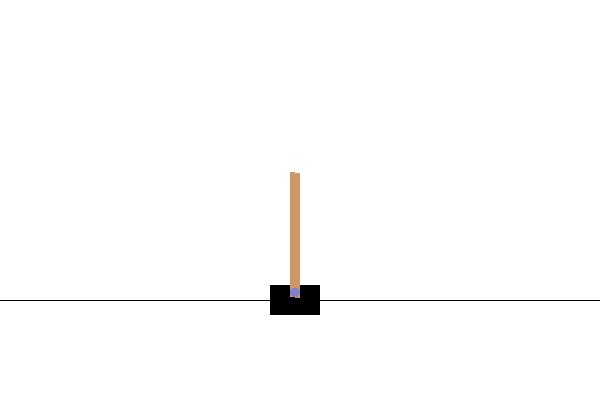

In [0]:
# from src.linear_fa import LinearFA


linear_fa_mean = utils.visualize(LinearFA, env, final_score=201)


## DQN

In [0]:
from src.DQN import DQN
import numpy as np

agent = DQN('TrainAgent', n_observations = len(env.observation_space.sample()), n_actions = env.action_space.n, hidden_dims = [32, 32])
target = DQN('TargetAgent', n_observations = len(env.observation_space.sample()), n_actions = env.action_space.n, hidden_dims = [32, 32])

N = 300
steps = 0
cnt = 0
total_rewards = []

In [0]:
for n in range(100):
    steps, total_reward = agent.train(env, target, 100, steps)
    total_rewards.append(total_reward)
    if n % 10 == 0:
        print(n, ': ', agent.epsilon, ' = ', sum(total_rewards[-10:]) / len(total_rewards[-10:]))

0 :  0.009985481677171622  =  124.3
10 :  0.009985481677171622  =  200.0
20 :  0.009985481677171622  =  200.0
30 :  0.009985481677171622  =  200.0
40 :  0.009985481677171622  =  89.1
50 :  0.009985481677171622  =  140.9
60 :  0.009985481677171622  =  192.4
70 :  0.009985481677171622  =  200.0
80 :  0.009985481677171622  =  119.0
90 :  0.009985481677171622  =  171.4


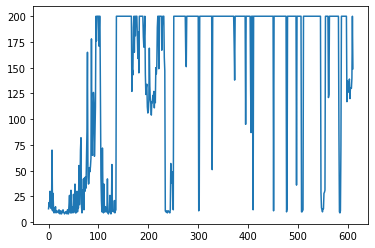

In [0]:
import matplotlib.pyplot as plt
plt.plot(total_rewards)

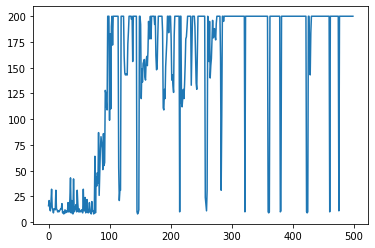

In [0]:
import matplotlib.pyplot as plt
plt.plot(total_rewards)

In [0]:
from src.DQN2 import *

In [0]:
test_model()

# env = gym.make("CartPole-v0")
num_actions = env.action_space.n
model = Model(num_actions)
target_model = Model(num_actions)
agent = DQNAgent(model, target_model,  env)
# test before
rewards_sum = agent.evalation(env)
print("Before Training: %d out of 200" % rewards_sum) # 9 out of 200

agent.train()
# test after
rewards_sum = agent.evalation(env)
print("After Training: %d out of 200" % rewards_sum) # 200 out of 200

/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning:

WARN: Box bound precision lowered by casting to float32



num_actions:  2
obs_shape:  (4,)
res of test model:  0 [ 0.00804063 -0.00062679]
Before Training: 11 out of 200
losses each 1000 steps:  0.04444677
losses each 1000 steps:  0.019430095
losses each 1000 steps:  0.28636515
losses each 1000 steps:  0.04859434
After Training: 78 out of 200
